In [163]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline
import numpy as np

In [164]:
do = pd.read_csv("dane_osobowe.csv", delimiter=";")

In [165]:
af = pd.read_csv("aktywnosc_fizyczna.csv", delimiter=";")

In [166]:
sp = pd.read_csv("stan_psychiczny.csv", delimiter=";")

In [167]:
on = pd.read_csv("ocena_nauczania.csv", delimiter=";")

In [168]:
for i in range(do.count()['id_dane']):
    if 'h)' in sp['negatywne_skutki'][i] and sp['negatywne_skutki'][i].count(')') > 1:
        sp = sp.drop(i)
    if 'g)' in sp['najtrudniejsze_rzeczy'][i] and sp['najtrudniejsze_rzeczy'][i].count(')') > 1:
        sp = sp.drop(i)
    if 'g)' in sp['kto_wspieral'][i] and sp['kto_wspieral'][i].count(')') > 1:
        sp = sp.drop(i)
    if 'h)' in on['wyzwania_nauczycieli'][i] and on['wyzwania_nauczycieli'][i].count(')') > 1:
        on = on.drop(i)

## AKTYWNOSC

In [169]:
aktywnosc_przed = af['aktywnosc_przed']

In [170]:
print(aktywnosc_przed.unique())

['d) 4' 'c) 3' 'b) 2' 'a) 1' 'e) 5']


In [171]:
print(aktywnosc_przed.value_counts())

c) 3    17
d) 4    14
e) 5    14
b) 2     4
a) 1     3
Name: aktywnosc_przed, dtype: int64


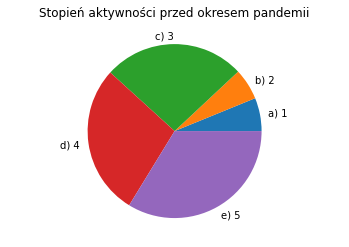

In [172]:
sums = af.groupby(af["aktywnosc_przed"])["id_aktywnosc"].sum()
axis('equal');
pie(sums, labels=sums.index);
plt.title('Stopień aktywności przed okresem pandemii', fontsize = 12)
show()

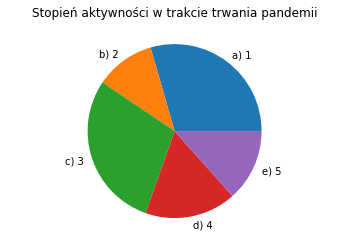

In [173]:
sums = af.groupby(af["aktywnosc_spadek"])["id_aktywnosc"].sum()
axis('equal');
pie(sums, labels=sums.index);
plt.title('Stopień aktywności w trakcie trwania pandemii', fontsize = 12)
show()

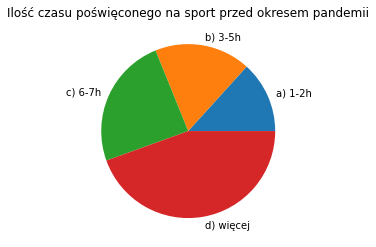

In [174]:
sums = af.groupby(af["sport_przed"])["id_aktywnosc"].sum()
axis('equal');
pie(sums, labels=sums.index);
plt.title('Ilość czasu poświęconego na sport przed okresem pandemii', fontsize = 12)
show()

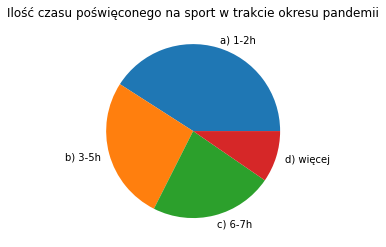

In [175]:
sums = af.groupby(af["sport_w_trakcie"])["id_aktywnosc"].sum()
axis('equal');
pie(sums, labels=sums.index);
plt.title('Ilość czasu poświęconego na sport w trakcie okresu pandemii', fontsize = 12)
show()

## STAN PSYCHICZNY

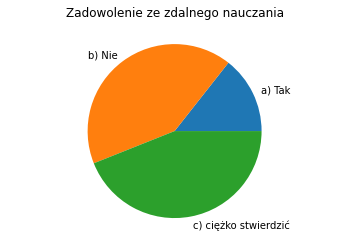

In [176]:
sums = sp.groupby(sp["zadowolenie_ze_zdalnego"])["id_stan"].sum()
axis('equal');
pie(sums, labels=sums.index);
plt.title('Zadowolenie ze zdalnego nauczania', fontsize = 12)
show()

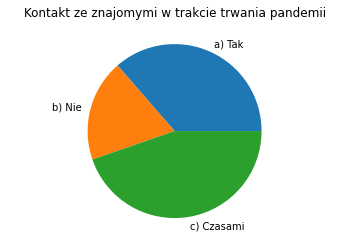

In [177]:
sums = sp.groupby(sp["brak_kontaktu"])["id_stan"].sum()
axis('equal');
pie(sums, labels=sums.index);
plt.title('Kontakt ze znajomymi w trakcie trwania pandemii', fontsize = 12)
show()

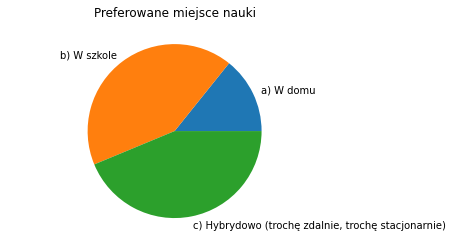

In [178]:
sums = sp.groupby(sp["preferowane_miejsce_nauki"])["id_stan"].sum()
axis('equal');
pie(sums, labels=sums.index);
plt.title('Preferowane miejsce nauki', fontsize = 12)
show()

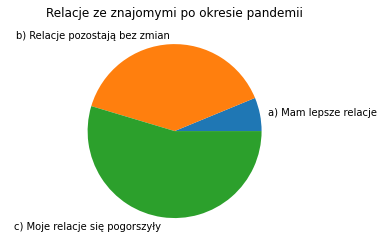

In [179]:
sums = sp.groupby(sp["relacje"])["id_stan"].sum()
axis('equal');
pie(sums, labels=sums.index);
plt.title('Relacje ze znajomymi po okresie pandemii', fontsize = 12)
show()

## KLASYFIKACJA

In [180]:
for i in range(af.count()['id_aktywnosc']):
    af['aktywnosc_przed'][i] = int(af['aktywnosc_przed'][i][-1:])
    af['aktywnosc_spadek'][i] = int(af['aktywnosc_spadek'][i][-1:])
    if 'a)' in af['sport_przed'][i]:
        af['sport_przed'][i] = 1.5
    elif 'b)' in af['sport_przed'][i]:
        af['sport_przed'][i] = 4
    elif 'c)' in af['sport_przed'][i]:
        af['sport_przed'][i] = 6.5
    elif 'd)' in af['sport_przed'][i]:
        af['sport_przed'][i] = 9
        
    if 'a)' in af['sport_w_trakcie'][i]:
        af['sport_w_trakcie'][i] = 1.5
    elif 'b)' in af['sport_w_trakcie'][i]:
        af['sport_w_trakcie'][i] = 4
    elif 'c)' in af['sport_w_trakcie'][i]:
        af['sport_w_trakcie'][i] = 6.5
    elif 'd)' in af['sport_w_trakcie'][i]:
        af['sport_w_trakcie'][i] = 9
    if 'a)' in af['kroki_przed'][i]:
        af['kroki_przed'][i] = 2500
    elif 'b)' in af['kroki_przed'][i]:
        af['kroki_przed'][i] = 7500
    elif 'c)' in af['kroki_przed'][i]:
        af['kroki_przed'][i] = 12500
    elif 'd)' in af['kroki_przed'][i]:
        af['kroki_przed'][i] = 7500
        
    if 'a)' in af['kroki_w_trakcie'][i]:
        af['kroki_w_trakcie'][i] = 2500
    elif 'b)' in af['kroki_w_trakcie'][i]:
        af['kroki_w_trakcie'][i] = 7500
    elif 'c)' in af['kroki_w_trakcie'][i]:
        af['kroki_w_trakcie'][i] = 12500
    elif 'd)' in af['kroki_w_trakcie'][i]:
        af['kroki_w_trakcie'][i] = 7500
        
    if (int(af['aktywnosc_spadek'][i]) <3 and 
        (af['kroki_w_trakcie'][i] >= af['kroki_przed'][i] or af['sport_w_trakcie'][i] >= af['sport_przed'][i])):
        af['klasa'][i] = 0
    elif(int(af['aktywnosc_spadek'][i]) > 3 and 
         af['kroki_w_trakcie'][i] < af['kroki_przed'][i] and af['sport_w_trakcie'][i] < af['sport_przed'][i]):
        af['klasa'][i] = 2
    else:
        af['klasa'][i] = 1
    
    

<ipython-input-180-9a7d61d8141e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-180-9a7d61d8141e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-180-9a7d61d8141e>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-180-9a7d61d8141e>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

In [181]:
X = af.drop('klasa', axis=1)
y = af['klasa']

In [182]:
X.shape

(52, 8)

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [185]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 0 0]
 [2 6 0]
 [0 0 1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.75      0.86         8
           2       1.00      1.00      1.00         1

    accuracy                           0.82        11
   macro avg       0.83      0.92      0.84        11
weighted avg       0.91      0.82      0.84        11



[Text(193.15384615384616, 195.696, 'X[2] <= 3.5\ngini = 0.589\nsamples = 41\nvalue = [9, 23, 9]'),
 Text(103.01538461538462, 152.208, 'X[3] <= 5.25\ngini = 0.436\nsamples = 28\nvalue = [9, 19, 0]'),
 Text(51.50769230769231, 108.72, 'X[7] <= 9.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]'),
 Text(25.753846153846155, 65.232, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(77.26153846153846, 65.232, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(154.52307692307693, 108.72, 'X[2] <= 2.5\ngini = 0.1\nsamples = 19\nvalue = [1, 18, 0]'),
 Text(128.76923076923077, 65.232, 'X[6] <= 5000.0\ngini = 0.245\nsamples = 7\nvalue = [1, 6, 0]'),
 Text(103.01538461538462, 21.744, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]'),
 Text(154.52307692307693, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(180.27692307692308, 65.232, 'gini = 0.0\nsamples = 12\nvalue = [0, 12, 0]'),
 Text(283.2923076923077, 152.208, 'X[6] <= 10000.0\ngini = 0.426\nsamples = 13\nvalue = [0, 4, 9]'),
 Tex

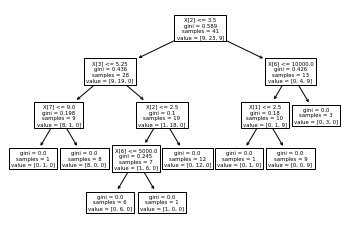

In [186]:
tree.plot_tree(classifier)

In [187]:
from apyori import apriori

In [188]:
for i in range(0,52):
    sp['klasa'][i]=af['klasa'][i]

<ipython-input-188-ebcaeba9ba40>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [189]:
for i in range(0,52):
    on['klasa'][i]=af['klasa'][i]

<ipython-input-189-4b141eaa84b8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [190]:
sp.shape

(51, 17)

In [191]:
records = []
for i in range(0,51):
    records.append([str(str(sp.values[i,j])+str(j)) for j in range(0,16)])
print(records)

[['10', 'b) Nie1', 'a) Tak2', 'b) W szkole3', 'e) 54', 'a) Tak5', 'a) Obniżenie nastroju,b) Brak energii,c) Ciągłe zmęczenie,d) Trudności ze snem,f) Uczucie niepokoju,6', 'a) Izolacja społeczna,c) Zdalne nauczanie,7', 'b) nie8', 'a) Wsparcie innych osób,9', 'a) tak10', 'c) Przyjaciele,11', 'a) Tak, wiele razy12', 'a) Mam lepsze relacje13', '114', '115'], ['20', 'b) Nie1', 'a) Tak2', 'c) Hybrydowo (trochę zdalnie, trochę stacjonarnie)3', 'd) 44', 'a) Tak5', 'a) Obniżenie nastroju,b) Brak energii,c) Ciągłe zmęczenie,6', 'a) Izolacja społeczna,c) Zdalne nauczanie,d) Zbyt wiele godzin spędzonych przy komputerze,e) Brak kontaktu z innymi osobami,f) Obawa o zachorowanie swoje lub bliskich,7', 'b) nie8', 'a) Wsparcie innych osób,9', 'a) tak10', 'a) Rodzice,b) Inni członkowie rodziny,c) Przyjaciele,11', 'a) Tak, wiele razy12', 'c) Moje relacje się pogorszyły13', '214', '215'], ['30', 'c) ciężko stwierdzić1', 'c) Czasami2', 'c) Hybrydowo (trochę zdalnie, trochę stacjonarnie)3', 'd) 44', 'a) Tak

In [192]:
rules = apriori(records, min_support = 0.35, min_confidence = 0.6, min_lift = 1.2, min_length = 2)
results = list(rules)

In [193]:
print(len(results))

5


In [194]:
print(results)

[RelationRecord(items=frozenset({'a) tak10', 'a) Tak, wiele razy12'}), support=0.39215686274509803, ordered_statistics=[OrderedStatistic(items_base=frozenset({'a) Tak, wiele razy12'}), items_add=frozenset({'a) tak10'}), confidence=0.8333333333333334, lift=1.4166666666666667), OrderedStatistic(items_base=frozenset({'a) tak10'}), items_add=frozenset({'a) Tak, wiele razy12'}), confidence=0.6666666666666666, lift=1.4166666666666665)]), RelationRecord(items=frozenset({'b) Relacje pozostają bez zmian13', 'a) tak10'}), support=0.35294117647058826, ordered_statistics=[OrderedStatistic(items_base=frozenset({'a) tak10'}), items_add=frozenset({'b) Relacje pozostają bez zmian13'}), confidence=0.6, lift=1.457142857142857), OrderedStatistic(items_base=frozenset({'b) Relacje pozostają bez zmian13'}), items_add=frozenset({'a) tak10'}), confidence=0.8571428571428572, lift=1.4571428571428573)]), RelationRecord(items=frozenset({'b) nie10', 'c) Moje relacje się pogorszyły13'}), support=0.35294117647058826

In [195]:
af.shape

(52, 9)

In [196]:
records = []
for i in range(0,52):
    records.append([str(str(af.values[i,j])+str(j)) for j in range(0,9)])
print(records)

[['10', '41', '32', '43', '1.54', '75005', '75006', '17', '18'], ['20', '31', '52', '43', '1.54', '75005', '25006', '27', '28'], ['30', '31', '52', '43', '1.54', '75005', '25006', '37', '28'], ['40', '41', '42', '93', '44', '75005', '25006', '47', '28'], ['50', '31', '32', '1.53', '1.54', '75005', '75006', '57', '18'], ['60', '41', '42', '43', '1.54', '75005', '25006', '67', '28'], ['70', '21', '32', '1.53', '1.54', '75005', '25006', '77', '18'], ['80', '31', '22', '43', '1.54', '125005', '75006', '87', '18'], ['90', '41', '32', '6.53', '1.54', '75005', '25006', '97', '18'], ['100', '31', '12', '1.53', '1.54', '75005', '75006', '107', '08'], ['110', '31', '22', '93', '44', '75005', '25006', '117', '18'], ['120', '21', '52', '1.53', '1.54', '75005', '25006', '127', '18'], ['130', '31', '12', '1.53', '44', '75005', '125006', '137', '08'], ['140', '31', '12', '1.53', '6.54', '75005', '25006', '147', '08'], ['150', '21', '12', '43', '44', '75005', '75006', '157', '08'], ['160', '31', '32',

In [197]:
rules = apriori(records, min_support = 0.3, min_confidence = 0.5, min_lift = 1.2, min_length = 2)
results = list(rules)

In [198]:
print(len(results))

3


In [199]:
print(results)

[RelationRecord(items=frozenset({'25006', '1.54'}), support=0.34615384615384615, ordered_statistics=[OrderedStatistic(items_base=frozenset({'1.54'}), items_add=frozenset({'25006'}), confidence=0.72, lift=1.44), OrderedStatistic(items_base=frozenset({'25006'}), items_add=frozenset({'1.54'}), confidence=0.6923076923076923, lift=1.44)]), RelationRecord(items=frozenset({'125005', '18'}), support=0.34615384615384615, ordered_statistics=[OrderedStatistic(items_base=frozenset({'125005'}), items_add=frozenset({'18'}), confidence=0.8571428571428571, lift=1.4377880184331797), OrderedStatistic(items_base=frozenset({'18'}), items_add=frozenset({'125005'}), confidence=0.5806451612903226, lift=1.4377880184331797)]), RelationRecord(items=frozenset({'93', '18'}), support=0.3269230769230769, ordered_statistics=[OrderedStatistic(items_base=frozenset({'18'}), items_add=frozenset({'93'}), confidence=0.5483870967741936, lift=1.3579109062980033), OrderedStatistic(items_base=frozenset({'93'}), items_add=froz

In [200]:
import plotly.express as px
fig = px.box(sp,x='zadowolenie_ze_zdalnego',y='klasa')
fig.show()

In [201]:
fig = px.box(sp,x='brak_kontaktu',y='klasa')
fig.show()

In [202]:
fig = px.box(sp,x='obciazenie_nauka',y='zadowolenie_ze_zdalnego',color = 'klasa')
fig.show()

In [203]:
for i,j in zip(sp['negatywne_skutki'],sp['ilosc_skutkow']):
    if 'h)' in i:
        j = 0
    else:
        j = i.count(')')

In [204]:
fig = px.box(on,x='stan_wiedzy',y='zadowolenie',color = 'klasa')
fig.show()

In [205]:
fig = px.box(sp,x='zdrowie_ucierpialo',y='ilosc_skutkow',color = 'klasa')
fig.show()